In [ ]:
# HIDE OUTPUT
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2022-12-08 00:22:36--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     184  --.-KB/s    in 0s      

2022-12-08 00:22:36 (5.76 MB/s) - ‘requirements.txt’ saved [184/184]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.0 MB 2.6 MB/s 
     |████████████████████████████████| 100 kB 8.5 MB/s 
     |████████████████████████████████| 16.8 MB 17.9 MB/s 
     |████████████████████████████████| 748.8 MB 15 kB/s 
     |████████████████████████████████| 9.7 MB 62.2 MB/s 
     |███████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np

data=pd.read_excel("sample_data/Pre_processed_data_2.xlsx")

In [ ]:
n = 1
df2 = data.iloc[:,n:]

In [ ]:
df2.head()

,Term,Home_Ownership,Purpose,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,1,5,0,445412,709,1167493,8,5214.74,17.2,6,1,228190,416746,1,0
1,1,1,3,0,262328,725,1169773,10,33295.98,21.1,35,0,229976,850784,0,0
2,1,2,3,0,99999999,741,2231892,8,29200.53,14.9,18,1,297996,750090,0,0
3,0,2,3,0,347666,721,806949,3,8741.90,12.0,9,0,256329,386958,0,0
4,1,3,3,0,176220,725,1169773,5,20639.70,6.1,15,0,253460,427174,0,0


In [ ]:
df3=df2[df2.Loan_Status==0]

In [ ]:
df2.Loan_Status.value_counts(normalize=True)

0    0.747893
1    0.252107
Name: Loan_Status, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df2.drop("Loan_Status", axis=1),
    df2["Loan_Status"],
    test_size=0.2,
    #shuffle=False,
    random_state=42,
)

In [ ]:
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

In [ ]:
df_y_test.value_counts(normalize=True)

Loan_Status
0              0.750488
1              0.249512
dtype: float64

In [ ]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.3, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.01, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/16 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
gen_x.head()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,0,0,0,830042,739,1242508,4,12422.165547,12.114260,19,0,1924679,683242,0,1
1,0,0,0,97372479,666,1186090,2,6768.912635,21.849958,11,0,2494065,391314,0,1
2,0,0,1,1186323,724,4616597,3,19952.868038,35.072929,7,0,2590968,171356,1,1
3,0,0,1,1106680,717,2274956,2,27087.417353,23.046619,16,0,1652974,171383,0,1
4,0,0,0,99717649,718,1666048,6,17452.789650,23.798478,9,0,2189639,474212,0,1


In [ ]:
gen_y.value_counts(normalize=True)

0    0.764682
1    0.235318
Name: Loan_Status, dtype: float64

In [ ]:
gen_x.shape

(103974, 15)

In [ ]:
gen_y.value_counts()

0    79507
1    24467
Name: Loan_Status, dtype: int64

In [ ]:
df_y_train.value_counts()

Loan_Status
0              53558
1              18116
dtype: int64

In [ ]:
df_x_train.describe()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,71674.000000,71674.000000,71674.000000,7.167400e+04,71674.000000,7.167400e+04,71674.000000,71674.000000,71674.000000,71674.000000,71674.000000,7.167400e+04,7.167400e+04,71674.000000,71674.000000
mean,0.734506,1.931719,3.548135,1.300243e+07,719.910205,1.332527e+06,6.123671,18444.183632,18.245894,11.147236,0.165053,2.947614e+05,7.891631e+05,0.115146,0.028853
std,0.441599,0.953759,1.568300,3.322938e+07,25.153263,1.017456e+06,3.522284,12082.981234,7.038745,5.007952,0.480319,3.604044e+05,9.722194e+06,0.347495,0.259711
min,0.000000,0.000000,0.000000,1.542200e+04,585.000000,7.662700e+04,1.000000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.000000,3.000000,1.803780e+05,713.000000,9.390750e+05,3.000000,10203.665000,13.500000,8.000000,0.000000,1.132210e+05,2.765070e+05,0.000000,0.000000
50%,1.000000,2.000000,3.000000,3.144680e+05,725.000000,1.169773e+06,6.000000,16183.155000,17.000000,10.000000,0.000000,2.100260e+05,4.745620e+05,0.000000,0.000000
75%,1.000000,3.000000,3.000000,5.333900e+05,737.000000,1.496440e+06,10.000000,23964.367500,21.700000,14.000000,0.000000,3.691985e+05,7.947665e+05,0.000000,0.000000
max,1.000000,3.000000,14.000000,1.000000e+08,751.000000,1.655574e+08,10.000000,229057.920000,70.500000,76.000000,15.000000,1.298696e+07,1.539738e+09,6.000000,15.000000


In [ ]:
gen_x.describe()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,103974.000000,103974.000000,103974.000000,1.039740e+05,103974.000000,1.039740e+05,103974.000000,103974.000000,103974.000000,103974.000000,103974.000000,1.039740e+05,1.039740e+05,103974.000000,103974.000000
mean,0.579712,1.806596,3.422394,1.957967e+07,715.560938,1.596455e+06,5.917393,20777.276513,19.194561,11.572537,0.269664,4.016721e+05,1.048086e+06,0.136553,0.084646
std,0.493607,0.976067,1.909283,3.893637e+07,30.232117,1.227546e+06,3.329005,14554.171179,7.808292,5.447271,0.559444,5.312796e+05,1.519093e+06,0.356352,0.294409
min,0.000000,0.000000,0.000000,2.182400e+04,595.000000,2.185620e+05,1.000000,191.330000,4.700000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,1.000000,3.000000,2.205060e+05,705.000000,9.668150e+05,3.000000,10908.660000,13.900000,8.000000,0.000000,1.243360e+05,3.143360e+05,0.000000,0.000000
50%,1.000000,2.000000,3.000000,4.339280e+05,725.000000,1.169773e+06,6.000000,17676.182120,17.842217,11.000000,0.000000,2.397990e+05,5.948360e+05,0.000000,0.000000
75%,1.000000,3.000000,3.000000,1.090830e+06,736.000000,1.742062e+06,10.000000,26624.462500,23.000000,14.000000,0.000000,4.587692e+05,1.043981e+06,0.000000,0.000000
max,1.000000,3.000000,13.000000,1.000000e+08,751.000000,8.927824e+06,10.000000,95445.407397,49.900000,36.000000,4.000000,4.004922e+06,1.775772e+07,3.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f191ecb3820>,
      dtype=object)

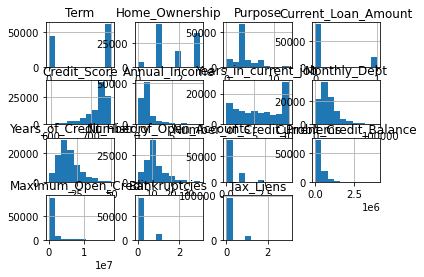

In [ ]:
gen_x.hist()

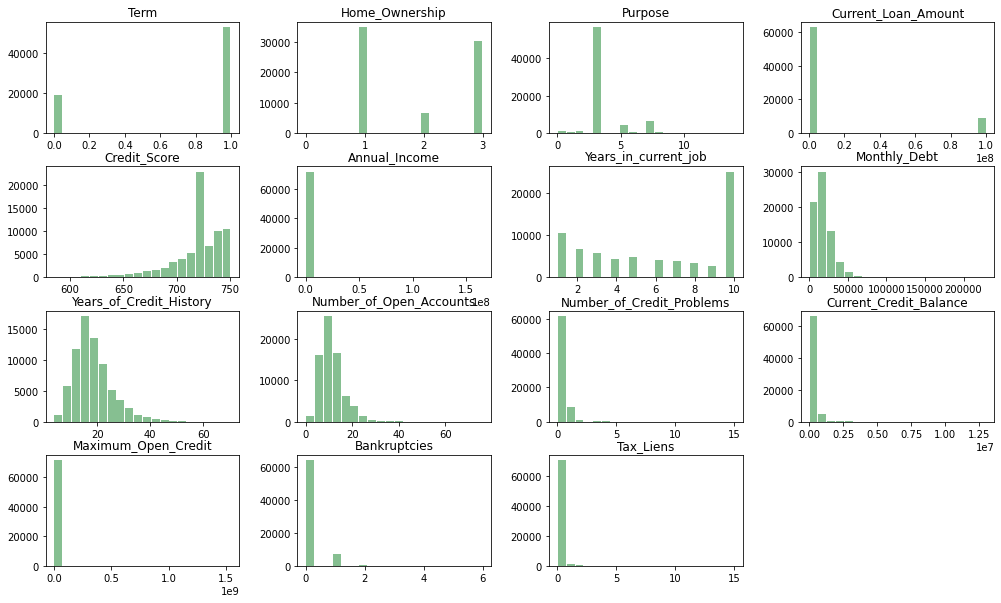

In [ ]:
ax = df_x_train.hist(bins=20, grid=False, figsize=(17,10), color='#86bf91', zorder=2, rwidth=0.9)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [ ]:
fig.savefig('real_data.png',dpi=400)

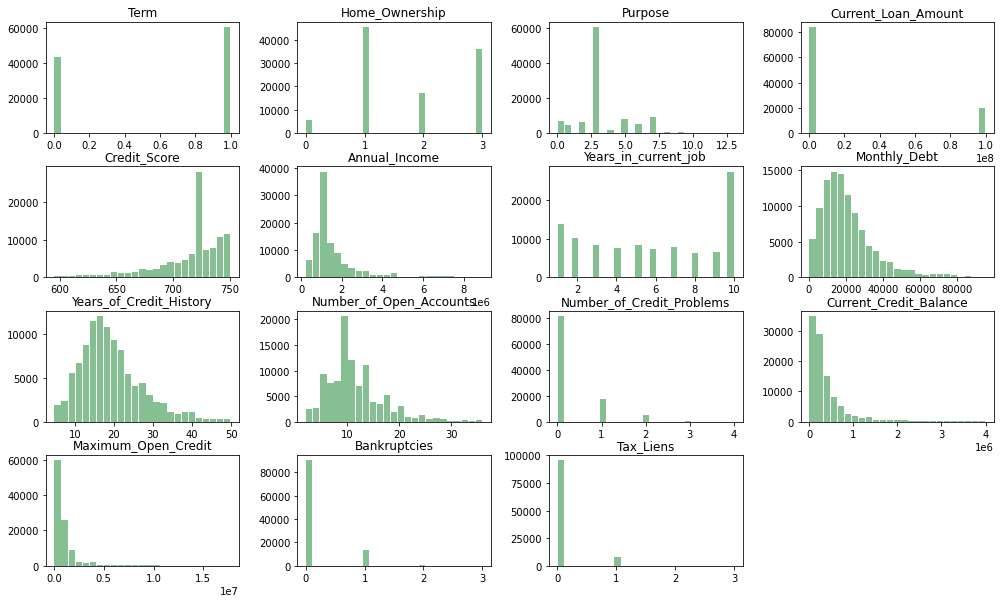

In [ ]:
ax = gen_x.hist(bins=25, grid=False, figsize=(17,10), color='#86bf91', zorder=2, rwidth=0.9)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(df_x_train)

In [ ]:
x_test_scaled=scaler.transform(df_x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
# simple linear regression
model1 = LogisticRegression()
model1.fit(x_train_scaled,df_y_train.to_numpy().ravel())

LogisticRegression()

In [ ]:
model1.score(x_test_scaled,df_y_test)

0.7502092750711535

In [ ]:
x_train_scaled2=scaler.fit_transform(gen_x)

In [ ]:
x_test_scaled2=scaler.transform(df_x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train_scaled, df_y_train.to_numpy().ravel())

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(x_test_scaled,df_y_test)

0.7501534683855126

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train_scaled2, gen_y)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(x_test_scaled2,df_y_test)

0.7482002343880797

In [ ]:
model1.score(x_test_scaled2,df_y_test)

0.7504883084993582

In [ ]:
gen=pd.concat([gen_x,gen_y],axis=1)

In [ ]:
gen.head()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,0,0,830042,739,1242508,4,12422.165547,12.114260,19,0,1924679,683242,0,1,1
1,0,0,0,97372479,666,1186090,2,6768.912635,21.849958,11,0,2494065,391314,0,1,1
2,0,0,1,1186323,724,4616597,3,19952.868038,35.072929,7,0,2590968,171356,1,1,1
3,0,0,1,1106680,717,2274956,2,27087.417353,23.046619,16,0,1652974,171383,0,1,0
4,0,0,0,99717649,718,1666048,6,17452.789650,23.798478,9,0,2189639,474212,0,1,0


In [ ]:
gen.to_excel("synthetic_data_2.xlsx")

In [ ]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_scaled, df_y_train.to_numpy().ravel())

DecisionTreeClassifier()

In [ ]:
model.score(x_test_scaled,df_y_test)

0.6593559908477036

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_scaled2, gen_y)

DecisionTreeClassifier()

In [ ]:
model.score(x_test_scaled2,df_y_test)

0.6633740722138513

**Model Building on Balanced data using GAN**

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_excel("sample_data/Pre_processed_data_2.xlsx")

In [ ]:
n = 1
df2 = data.iloc[:,n:]

In [ ]:
df2.head()

,Term,Home_Ownership,Purpose,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,1,5,0,445412,709,1167493,8,5214.74,17.2,6,1,228190,416746,1,0
1,1,1,3,0,262328,725,1169773,10,33295.98,21.1,35,0,229976,850784,0,0
2,1,2,3,0,99999999,741,2231892,8,29200.53,14.9,18,1,297996,750090,0,0
3,0,2,3,0,347666,721,806949,3,8741.90,12.0,9,0,256329,386958,0,0
4,1,3,3,0,176220,725,1169773,5,20639.70,6.1,15,0,253460,427174,0,0


In [ ]:
gen=pd.read_excel("sample_data/synthetic_data_2.xlsx")

In [ ]:
gen.head()

,Unnamed: 0,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,0,0,0,830042,739,1242508,4,12422.165547,12.114260,19,0,1924679,683242,0,1,1
1,1,0,0,0,97372479,666,1186090,2,6768.912635,21.849958,11,0,2494065,391314,0,1,1
2,2,0,0,1,1186323,724,4616597,3,19952.868038,35.072929,7,0,2590968,171356,1,1,1
3,3,0,0,1,1106680,717,2274956,2,27087.417353,23.046619,16,0,1652974,171383,0,1,0
4,4,0,0,0,99717649,718,1666048,6,17452.789650,23.798478,9,0,2189639,474212,0,1,0


In [ ]:
gen=gen.iloc[:,n:]

In [ ]:
gen.head()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,0,0,830042,739,1242508,4,12422.165547,12.114260,19,0,1924679,683242,0,1,1
1,0,0,0,97372479,666,1186090,2,6768.912635,21.849958,11,0,2494065,391314,0,1,1
2,0,0,1,1186323,724,4616597,3,19952.868038,35.072929,7,0,2590968,171356,1,1,1
3,0,0,1,1106680,717,2274956,2,27087.417353,23.046619,16,0,1652974,171383,0,1,0
4,0,0,0,99717649,718,1666048,6,17452.789650,23.798478,9,0,2189639,474212,0,1,0


In [ ]:
gen_default= gen[gen['Loan_Status']==1]

In [ ]:
gen_default

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,0,0,830042,739,1242508,4,12422.165547,12.114260,19,0,1924679,683242,0,1,1
1,0,0,0,97372479,666,1186090,2,6768.912635,21.849958,11,0,2494065,391314,0,1,1
2,0,0,1,1186323,724,4616597,3,19952.868038,35.072929,7,0,2590968,171356,1,1,1
5,0,0,0,97567882,695,1513124,1,16755.366217,14.249233,6,0,1280143,210487,0,1,1
6,0,0,0,96315880,724,1749853,5,24550.912379,9.660603,7,0,1791421,373820,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98646,1,3,3,81224,713,1592485,1,6582.360000,21.900000,4,0,42807,76846,0,0,1
98650,1,3,3,266464,725,1169773,10,7059.450000,10.100000,5,0,203452,244354,0,0,1
98656,1,1,3,272294,725,1169773,5,6140.800000,11.100000,7,0,275709,454102,0,0,1
98657,1,3,3,109692,735,625252,5,5679.290000,17.400000,9,0,99180,256916,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df2.drop("Loan_Status", axis=1),
    df2["Loan_Status"],
    test_size=0.2,
    #shuffle=False,
    random_state=42,
)

In [ ]:
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

In [ ]:
df_x_train

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
16596,0,3,3,543730,631,1408755,4,18196.49,15.0,15,0,120821,178420,0,0
80236,1,3,1,770616,715,1616292,8,40407.30,18.4,11,0,263891,350020,0,0
51215,1,1,3,737572,706,2906430,1,12497.63,12.6,7,0,191919,428186,0,0
45152,1,1,3,441056,719,1195784,10,24015.43,17.9,12,0,643568,852588,0,0
87116,1,1,0,71566,722,1769109,6,19460.37,24.0,5,0,178809,212344,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,1,7,92686,725,1169773,10,8137.32,16.9,4,1,52782,74162,1,0
54886,0,3,3,244794,641,1868783,8,44694.84,16.0,22,0,411331,601370,0,0
76820,1,3,3,232738,710,1009831,10,13801.22,22.5,17,0,189297,1204368,0,0
860,1,1,5,64856,722,1306991,10,15139.20,24.5,4,0,51813,69212,0,0


In [ ]:
df_x_test

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,0,1,3,550770,725,1169773,10,19787.74,26.5,11,0,501087,1148906,0,0
1,1,1,3,222706,742,1154022,1,32889.57,17.9,12,1,175066,483780,1,0
2,1,1,3,99999999,735,1790199,9,16260.96,17.0,14,0,452409,995918,0,0
3,1,1,3,435028,723,1502824,10,18159.25,13.5,11,0,129143,171886,0,0
4,0,1,3,524436,725,1169773,10,36324.58,19.3,15,0,684646,886732,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,0,1,3,273394,668,791768,9,10689.02,13.0,12,0,216999,536888,0,0
17915,1,1,3,215930,725,1169773,7,32168.71,16.8,12,1,30970,239096,1,0
17916,0,1,0,556182,659,1263329,10,11791.02,14.1,13,1,222908,670406,1,0
17917,1,1,3,132154,745,817893,6,14381.29,13.4,22,0,252320,447392,0,0


In [ ]:
df_y_train.value_counts()

Loan_Status
0              53558
1              18116
dtype: int64

In [ ]:
df_train=pd.concat([df_x_train,df_y_train],axis=1)

In [ ]:
df_train.head()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
16596,0,3,3,543730,631,1408755,4,18196.49,15.0,15,0,120821,178420,0,0,0
80236,1,3,1,770616,715,1616292,8,40407.30,18.4,11,0,263891,350020,0,0,0
51215,1,1,3,737572,706,2906430,1,12497.63,12.6,7,0,191919,428186,0,0,0
45152,1,1,3,441056,719,1195784,10,24015.43,17.9,12,0,643568,852588,0,0,0
87116,1,1,0,71566,722,1769109,6,19460.37,24.0,5,0,178809,212344,0,0,0


In [ ]:
df_y_train.head()

,Loan_Status
16596,0
80236,0
51215,0
45152,0
87116,0


In [ ]:
bal_df=pd.concat([df_train, gen_default], ignore_index=True, sort=False)

In [ ]:
bal_df.head()

,Term,Home_Ownership,Purpose,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,0,3,3,543730,631,1408755,4,18196.49,15.0,15,0,120821,178420,0,0,0
1,1,3,1,770616,715,1616292,8,40407.30,18.4,11,0,263891,350020,0,0,0
2,1,1,3,737572,706,2906430,1,12497.63,12.6,7,0,191919,428186,0,0,0
3,1,1,3,441056,719,1195784,10,24015.43,17.9,12,0,643568,852588,0,0,0
4,1,1,0,71566,722,1769109,6,19460.37,24.0,5,0,178809,212344,0,0,0


In [ ]:
bal_df.Loan_Status.value_counts(normalize=True)

0    0.557078
1    0.442922
Name: Loan_Status, dtype: float64

In [ ]:
y_bal_df=bal_df[['Loan_Status']]

In [ ]:
x_bal_df=bal_df.drop(['Loan_Status'],axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(x_bal_df)

In [ ]:
x_test_scaled=scaler.transform(df_x_test)

In [ ]:
y_bal_df.value_counts()

Loan_Status
0              53558
1              42583
dtype: int64

In [ ]:
y=y_bal_df.to_numpy().ravel()

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [ ]:
a=make_scorer(recall_score)

In [ ]:
solver='lbfgs',class_weight='balanced', max_iter=10000

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["lbfgs"],
          "class_weight":["balanced"],
          "max_iter":[10000]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring='recall', n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(x_train_scaled, y)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(x_train_scaled, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.0001, 'class_weight': 'balanced', 'max_iter': 10000, 'solver': 'lbfgs'}


LogisticRegression(C=0.0001, class_weight='balanced', max_iter=10000)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predict=lr_clf.predict(x_test_scaled)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.58      0.68     13448
           1       0.33      0.62      0.43      4471

    accuracy                           0.59     17919
   macro avg       0.58      0.60      0.56     17919
weighted avg       0.70      0.59      0.62     17919



In [ ]:
predict=lr_clf.predict(x_test_scaled)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.58      0.68     13448
           1       0.33      0.62      0.43      4471

    accuracy                           0.59     17919
   macro avg       0.58      0.60      0.56     17919
weighted avg       0.70      0.59      0.62     17919



In [ ]:
b=a=make_scorer(recall_score,pos_label=1)

In [ ]:
b=make_scorer(recall_score,pos_label=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [20,60,100, 120]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring='recall', cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(x_train_scaled, y)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train_scaled, y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


RandomForestClassifier(n_estimators=60)

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [20,60,100, 120]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
 
bootstrap = [True, False] 
params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
      'bootstrap':bootstrap    }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring=b, cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(x_train_scaled, y)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train_scaled, y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}


RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=20)

In [ ]:
predict=rf_clf.predict(x_test_scaled)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     13448
           1       0.41      0.17      0.24      4471

    accuracy                           0.73     17919
   macro avg       0.59      0.55      0.54     17919
weighted avg       0.68      0.73      0.69     17919



In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=50)

In [ ]:
rf_clf2.fit(x_bal_df, y)

RandomForestClassifier(n_estimators=50)

In [ ]:
predict=rf_clf2.predict(df_x_test)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     13448
           1       0.45      0.25      0.32      4471

    accuracy                           0.74     17919
   macro avg       0.61      0.57      0.58     17919
weighted avg       0.70      0.74      0.71     17919



In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [ ]:
a=make_scorer(recall_score)

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rf_Grid = GridSearchCV(estimator = rfc, param_grid = param_grid,scoring=a, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(x_train_scaled,y)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [20, 60, 100, 120]},
             scoring=make_scorer(recall_score), verbose=2)

In [ ]:
p=rf_Grid.best_params_

In [ ]:
rfc2=RandomForestClassifier(**p)

In [ ]:
rfc2.fit(x_train_scaled,y)

RandomForestClassifier(bootstrap=False, max_depth=4, max_features='sqrt',
                       min_samples_split=5, n_estimators=20)

In [ ]:
predict=rfc2.predict(x_test_scaled)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     13448
           1       0.38      0.38      0.38      4471

    accuracy                           0.69     17919
   macro avg       0.59      0.59      0.59     17919
weighted avg       0.69      0.69      0.69     17919



In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(df_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     13448
           1       0.46      0.25      0.32      4471

    accuracy                           0.74     17919
   macro avg       0.62      0.57      0.58     17919
weighted avg       0.70      0.74      0.71     17919



In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [ ]:
log_reg.fit(x_train_scaled,y)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
y_pred = log_reg.predict(x_test_scaled)

In [ ]:
print(classification_report(df_y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76     13448
           1       0.36      0.48      0.41      4471

    accuracy                           0.66     17919
   macro avg       0.58      0.60      0.59     17919
weighted avg       0.69      0.66      0.67     17919



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train_scaled,y)
predict=dtc.predict(x_test_scaled)
from sklearn.metrics import classification_report
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     13448
           1       0.33      0.35      0.34      4471

    accuracy                           0.66     17919
   macro avg       0.55      0.56      0.56     17919
weighted avg       0.67      0.66      0.66     17919



In [ ]:
dtc.fit(x_bal_df,y)
predict=dtc.predict(df_x_test)
from sklearn.metrics import classification_report
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     13448
           1       0.33      0.35      0.34      4471

    accuracy                           0.66     17919
   macro avg       0.55      0.56      0.56     17919
weighted avg       0.67      0.66      0.66     17919



In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring='recall', n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_bal_df, y)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_bal_df, y)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=19)

In [ ]:

tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=19,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best'
    )

In [ ]:
tree_clf.fit(x_bal_df, y)

DecisionTreeClassifier(max_depth=19)

In [ ]:
predict=tree_clf.predict(df_x_test)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77     13448
           1       0.36      0.43      0.39      4471

    accuracy                           0.66     17919
   macro avg       0.58      0.59      0.58     17919
weighted avg       0.69      0.66      0.67     17919



In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=50)

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
lr=LogisticRegression(C=0.0001, class_weight='balanced', max_iter=10000,solver='lbfgs')

In [ ]:
lr.fit(x_train_scaled,y)

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=10000)

In [ ]:
predict=lr.predict(x_test_scaled)

In [ ]:
report=classification_report(df_y_test,predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.58      0.68     13448
           1       0.33      0.62      0.43      4471

    accuracy                           0.59     17919
   macro avg       0.58      0.60      0.56     17919
weighted avg       0.70      0.59      0.62     17919



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=0.0001, class_weight='balanced', max_iter=10000,solver='lbfgs'), 
               DecisionTreeClassifier(criterion='gini',
    max_depth=19,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best'),
               RandomForestClassifier(n_estimators=50)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train_scaled,y)
    yproba = model.predict_proba(x_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(df_y_test,  yproba)
    auc = roc_auc_score(df_y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 7.4360499702558e-05, 7.4360499...","[0.0, 0.00022366360993066427, 0.00044732721986...",0.658125
DecisionTreeClassifier,"[0.0, 0.0655116002379536, 0.06558596073765616,...","[0.0, 0.093267725341087, 0.093267725341087, 0....",0.626554
RandomForestClassifier,"[0.0, 0.000148720999405116, 0.0002230814991076...","[0.0, 0.0, 0.0, 0.0008946544397226571, 0.00246...",0.697514


In [ ]:
import matplotlib.pyplot as plt

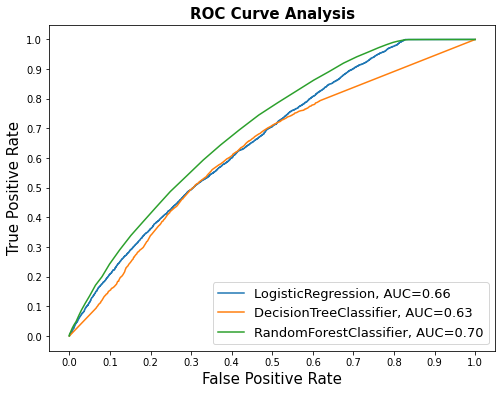

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
##plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
fig.savefig('multiple_roc_curve_2.png',dpi=400)